In [1]:
# Investigate Numeric relationships and use a different scalar
# Find a better way to deal with NA's
# Need to work out which variable are correlated to drop
# Need to see if any variables are duplicated
# Need to see if any variables are constant for both above and under 50K
# how are you dealing with class inbalance

In [1]:
import pandas as pd
from config import config
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import preprocessors
from pipeline import income_pipeline
from helpers import get_meta_columns, plot_categoricial
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
data = pd.read_csv(config.TRAIN_DIR, names=get_meta_columns(), na_values=' ?')

# # encodes the target variable as binary
data[config.TARGET] = data[config.TARGET].map(config.TARGET_ENCODING)
 
X_train, X_test, y_train, y_test = train_test_split(
         data[config.FEATURES], data[config.TARGET], test_size=0.2, random_state=0
         )  

In [3]:
visualisation_pipeline = Pipeline(
    [
        (
            "EncodeNotInUniverse",
            preprocessors.EncodeNotInUniverse(variables=config.FEATURES),
        ),
        (
            "DropNaFeatures",
            preprocessors.DropDuplicates(variables=config.DUPLICATE_VALS),
        ),
        (
            "Fill_NA_encoder",
            preprocessors.FillNAEncoder(variables=config.CATEGORICAL_VALS),
        ),
        (
            "Education Encoder",
            preprocessors.EducationEncoder(variables='education'),
        ),
        (
            "categorical_encoder",
            preprocessors.CategoricalEncoder(variables=config.CATEGORICAL_VALS[1:]),
        ),
    ])

X_train_processed = visualisation_pipeline.fit_transform(X_train[config.FEATURES], y_train) 

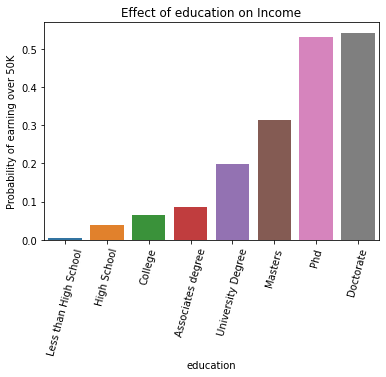

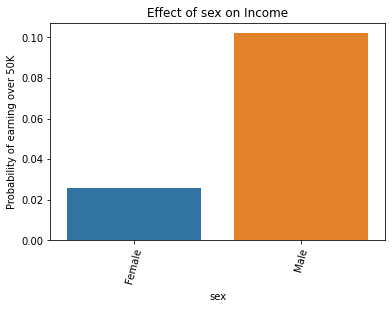

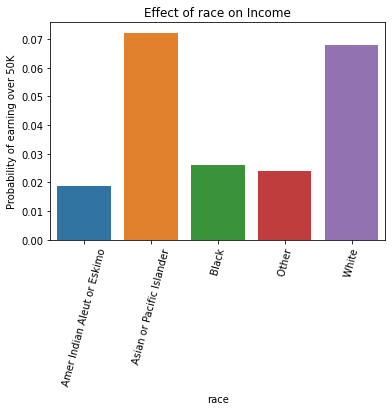

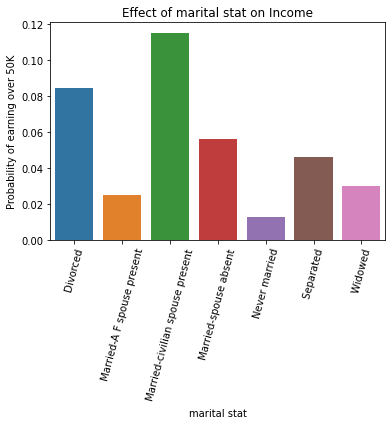

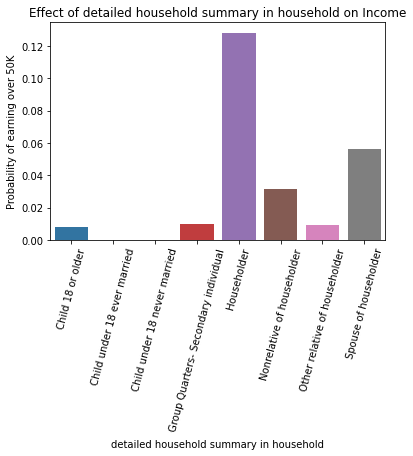

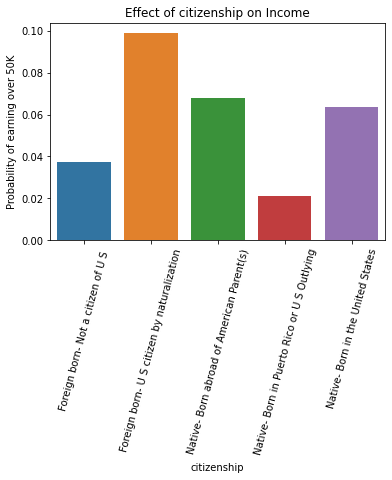

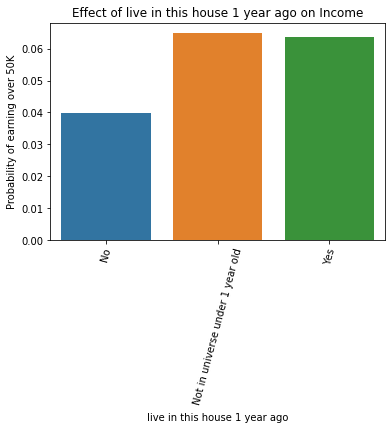

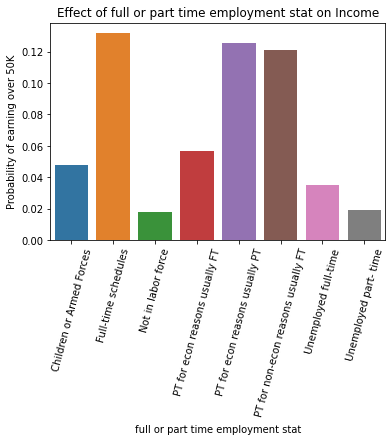

In [7]:

plotting_df = pd.DataFrame(pd.concat([X_train_processed, y_train], axis=1))
def analysis_categoricial(df, var):
    temp = df[['Income',var]].groupby(var).mean().reset_index()
    axis = sns.barplot(x=var, y='Income', data=temp)
    axis.set(ylabel ="Probability of earning over 50K")
    if var == 'education':
        axis.set_xticklabels(config.vis_dict[var])
    plt.title(f"Effect of {var} on Income")
    plt.xticks(rotation=75)
    plt.show()

variables_not_plotted = [
    'hispanic origin',
    'tax filer stat',
    'state of previous residence',
	'state of previous residence',
	'migration code-move within reg',
	'member of a labor union'
]
for var in config.CATEGORICAL_VALS:
    if var not in variables_not_plotted:
        analysis_categoricial(plotting_df, var)

# for var in config.DROP_VALS:
#     analysis_categoricial(data, var)
# 
# # Cardinality check
# for var in config.DROP_VALS:
#     print(var, len(data[var].unique()))




In [8]:
plotting_df['full or part time employment stat'].unique()


        
        

array([' Children or Armed Forces', ' Full-time schedules',
       ' Not in labor force', ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually FT',
       ' PT for econ reasons usually PT', ' Unemployed part- time',
       ' Unemployed full-time'], dtype=object)

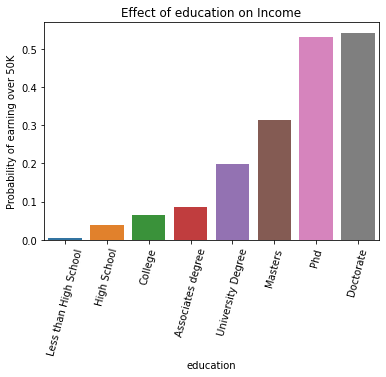

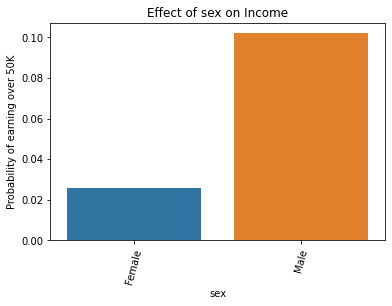

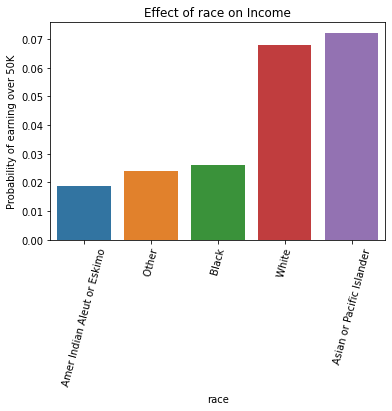

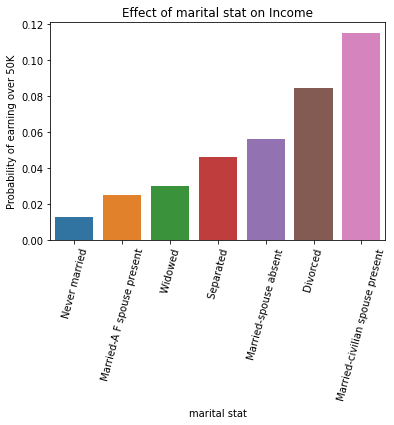

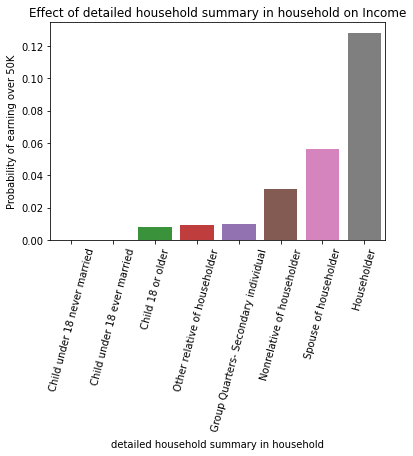

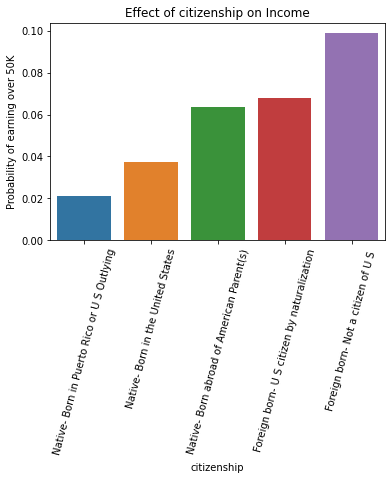

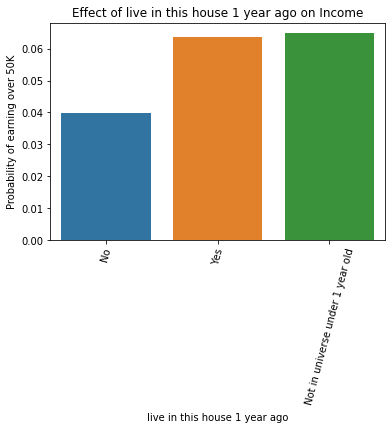

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

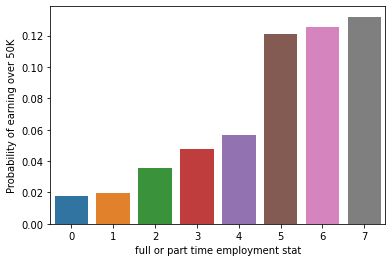

In [4]:
plotting_df = pd.DataFrame(pd.concat([X_train_processed, y_train], axis=1))
variables_not_plotted = [
    'hispanic origin',
    'tax filer stat',
    'state of previous residence',
	'state of previous residence',
	'migration code-move within reg',
	'member of a labor union'
]
for var in config.CATEGORICAL_VALS:
    if var not in variables_not_plotted:
        plot_categoricial(plotting_df, var)



